# Анализ компьютерных игр

## Обзор данных

In [1]:
#подключим необходимые для работы библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#откроем датасет
try:
    data = pd.read_csv('C:\\Users\\1\\Documents\\датасеты\\games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
    
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка данных

*План:*

- Замена названий столбцов (приведение к нижнему регистру);

- Аббревиатура 'tbd' в столбце с оценкой пользователей;

- Изменение типа данных;

- Работа с пропусками;

- Подсчет суммарных продаж во всех регионах.


### Замена названий столбцов

In [3]:
#ознакомимся с общей информацией датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#ознакомимся с названиями столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
#приведем к нижнему регистру названия столбцов
data.columns = [x.lower() for x in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Аббревиатура 'tbd' в столбце с оценкой пользователей

Столбец 'user_score' имеет тип данных object, так как в дальнейшем данные из этого столбца потребуются для проверки гипотез, необходимо их привести к типу float. Однако прежде чем изменить тип данных в столбце, следует выяснить почему значения стали object 

In [6]:
#изучим какими знчениями заполнен столбец 'user_score'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце присутствует значание 'tbd', что  означает 'подлежит определению' (от англ. Тo Be Determined).

In [7]:
#посмотрим срез таблицы с значением 'tbn' в user_score, чтобы понять возможную природу появления данного значения
data.loc[data['user_score']=='tbd'].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Можно предположить, что заполнение данным значением произошло, когда не была получена оценка пользователей, предлагается заполнить NaN

In [8]:
#заполним строки со значением 'tbn' 
print('Количество значений tbn до:', len(data.loc[data['user_score']=='tbd', 'user_score']))
print('Количество значений Nan до:', len(data.loc[data['user_score'].isna()]))
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
print('Количество значений tbn после:', len(data.loc[data['user_score']=='tbd', 'user_score']))
print('Количество значений Nan после:', len(data.loc[data['user_score'].isna()]))

Количество значений tbn до: 2424
Количество значений Nan до: 6701
Количество значений tbn после: 0
Количество значений Nan после: 9125


### Изменение типа данных

In [9]:
#изменим тип данных в столбце user_score 
data['user_score'] = data['user_score'].astype(float)
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [10]:
#в столбце с годом выпуска тип данных float, изменим на int
#data['year_of_release'] = data['year_of_release'].astype(int)
#data.dtypes

Поскольку в столбце с годом выпуска есть строки с отсутствием значения (NaN), а заполнять их нулями или удалять не планируется, оставим тип данных float

### Работа с пропусками

In [11]:
#проверим датасет на наличие явных дубликатов
print('Количество полных дубликатов:', data.duplicated().sum())

Количество полных дубликатов: 0


In [12]:
#узнаем количество пропусков 
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

In [13]:
#изучим значения в столбце critic_score
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [14]:
#изучим значения в столбце rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
#т.к. rating - категориальная переменная, предлагается заменить отсутствующие значения на "не определен" (not defined)
data.loc[data['rating'].isna(), 'rating'] = 'not defined'
data.loc[data['rating']=='not defined'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not defined
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not defined
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,not defined
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,not defined
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,not defined


In [16]:
data['rating'].unique()

array(['E', 'not defined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [17]:
#изменим тип данных в rating на 
data['rating'] = data['rating'].astype('category')
data.dtypes

name                 object
platform             object
year_of_release     float64
genre                object
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating             category
dtype: object

In [18]:
#после обработки пропусков 
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.000000
dtype: float64

#### Вывод
В результате проведенной работы были заполнены пропуски в rating значением "не определен". 
В датасете остались значительные пропуски данных (более 50%)  в столбцах critic_score и user_score. Заполнение пропусков может привести к искажению результатов корреляционного анализа и стат-тестов. Следовательно, пропуски не стоит обрабатывать в данных столбцах.
Пропуски в столбцах name, year_of_release, genre составляют менее 2%, поэтому эти значения проще не рассматривать при исследовательском анализе. 

### Подсчет суммарных продаж во всех регионах

In [19]:
#создадим новый столбец и запишем в него общее количесвто проданных копий во всех регионах
data['total_sales'] = data['na_sales'] +  data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not defined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not defined,31.38


## Исследовательский анализ данных

*План:*

- Анализ распределения игр по годам
- Анализ продаж по платформам
- Анализ жизненного цикла платформ
- Оценка прибыльности платформ
- Оценка влияния отзывов пользователей и критиков на продажи внутри платформы
- Анализ распределения игр по жанрам 

### Анализ распределения игр по годам

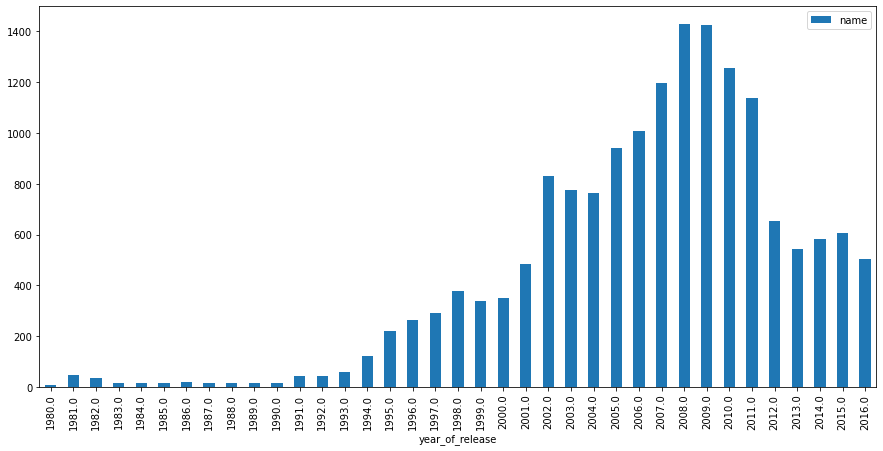

In [20]:
#посмотрим, сколько игр выпускалось в разные годы
(
    data
    .dropna(subset=['year_of_release'])
    .groupby('year_of_release').agg({'name':'count'})
    .plot.bar(figsize=(15, 7))
    
)
plt.show()

Судя по графику, из выборки можно исключить данные до 1994 года. С точки зрения распределения значений, данные до 1994 года похожи на "хвост", который может искажать общую картину. 
График распределения игр по годам выпуска также позволяет оценить ситуацию в целом на рынке компьютерных игр: начиная с 1991 года и по 2008 год включительно фиксировался стабильный рост числа выпускаемых игр, с 2009 по 2011 плавный спад. В 2012 количество выпускаемых игр резко снизилось, скорее всего, это обусловленно началом массового использования смартфонов и, как следствие, разработкой для данных гаджетов приложений и игр. 
Учитывая стремительное развитие индустрии компьютерных игр, скорее всего, в окончательную выборку для анализа попадут игры последних 3-4 лет. 

### Анализ продаж по платформам

<AxesSubplot:xlabel='year_of_release'>

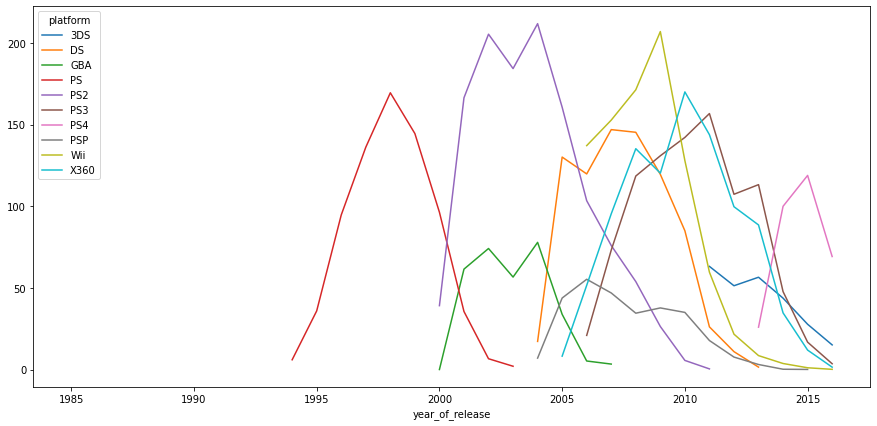

In [21]:
#найдем платформы с наибольшими суммарными продажами и построим распределение по годам
top_10 = (
    data
    .dropna(subset=['year_of_release'])
    .groupby('platform').agg({'total_sales':'sum'})
    .sort_values(by='total_sales', ascending=False)
    .head(10).index
)

(
    data
    .query('platform in @top_10')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(15, 7))
)

Все платформы демонстрируют примерно одинаковую закономерность роста в первой половине жизненного цикла и спада во второй половине

### Анализ жизненного цикла платформ

In [22]:
#узнаем за какой характерный срок появляются новые и исчезают старые платформы
platform_cycle = (
     data
    .dropna(subset=['year_of_release'])
    .query('year_of_release >= 1994')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)
platform_cycle

platform,3DO,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1994.0,0.02,NaN,NaN,NaN,12.18,NaN,NaN,8.13,NaN,0.11,...,3.65,0.36,35.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995.0,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,NaN,...,11.57,NaN,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,NaN,NaN,NaN,36.03,NaN,NaN,NaN,34.10,NaN,...,7.69,NaN,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,39.50,NaN,...,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,3.38,NaN,26.90,NaN,NaN,NaN,49.24,NaN,...,3.82,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999.0,NaN,NaN,5.16,NaN,38.00,NaN,NaN,NaN,57.87,NaN,...,0.09,NaN,0.26,NaN,0.46,NaN,NaN,NaN,NaN,NaN
2000.0,NaN,NaN,5.99,NaN,19.76,0.07,NaN,NaN,33.97,NaN,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2001.0,NaN,NaN,1.07,NaN,9.24,61.53,26.34,NaN,3.25,NaN,...,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,22.26,NaN
2002.0,NaN,NaN,0.29,NaN,NaN,74.16,51.81,NaN,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN


Text(0.5, 1.0, 'Жизненный цикл платформ')

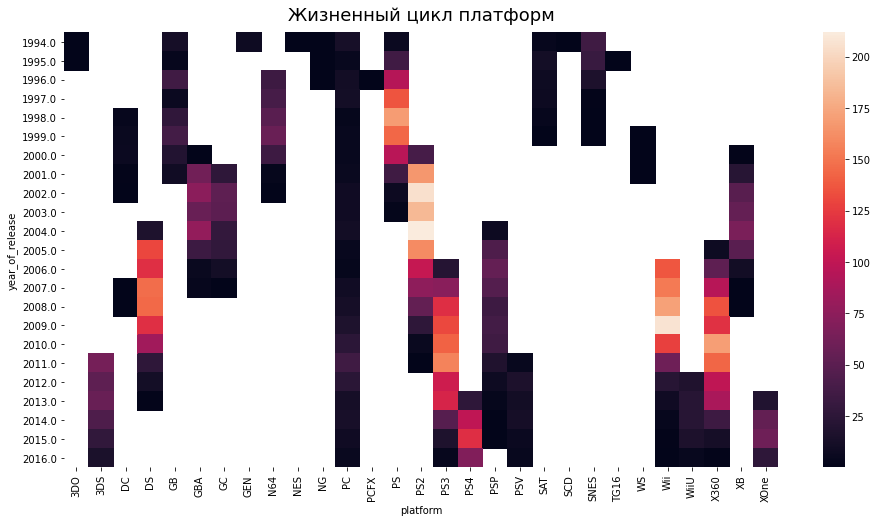

In [23]:
#построим хитмэп, чтобы увидеть период жизни платформ
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(platform_cycle)
heatmap.set_title('Жизненный цикл платформ', fontdict={'fontsize':18}, pad=12)

Для определения жизненного цикла платформы были проанализированы платформы игровых приставок от Nintendo, Sony и Microsoft. 
Так, например, Sony примерно каждые 6-7 лет создает новую платформу, при этом старая версия платформы исчезает с рынка компьютерных игр с момента выхода новой в среднем за 4-6 лет. Средний жизненный цикл у платформы около 10-12 лет.

Компания Nintendo создает раз в 6 лет новую платформу, старая версия исчезает за 2-5 лет, средний срок жизни платформ 8-11 лет.

Microsoft создает новую платформу каждые 5-8 лет, старая платформа исчезает в среднем за 4 года. Средний жизненный цикл платформ - 10, 5 лет.

Таким образом,средний жизненный цикл плаформ у разных производителей в целом одиниковый и составляет 10,5 лет. При этом все платформы демонстрируют примерно одинаковую закономерность роста в первой половине жизненного цикла и спада во второй половине. 

Предлагается в качестве актуального периода взять половину жизненного цикла платформ, поскольку за этот период можно будет отследить тенденцию роста или спада. Также 5-летний период должен позволить оценить ситуацию на рынке компьютерных игр с учетом разного срока выхода платформ. 

На основании изложенного, в выборку для дальнейшего анализа попадут игры, дата релиза которых состоялась не позднее 2012 года. 

In [24]:
#создадим переменную и поместим в нее данные за актуальный период
actual_data = (
    data
    .dropna(subset=['year_of_release'])
    .query('year_of_release >= 2012')
)
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not defined,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,not defined,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Оценка прибыльности платформ

<AxesSubplot:xlabel='platform'>

<AxesSubplot:ylabel='total_sales'>

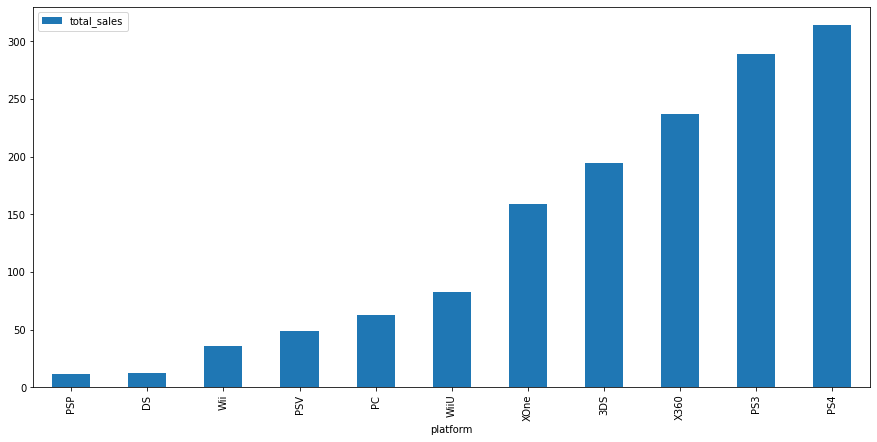

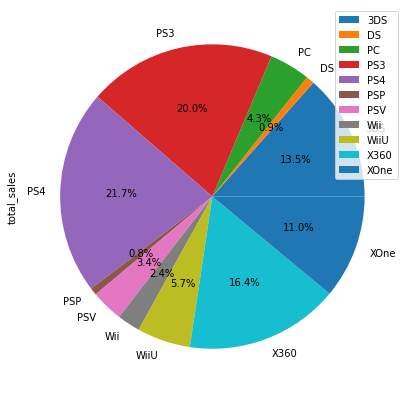

In [25]:
#посмотрим для каких платформ больше всего продается игр
display(
    actual_data
    .groupby('platform').agg({'total_sales':'sum'})
    .sort_values(by='total_sales')
    .plot.bar(figsize=(15, 7))
)

(
    actual_data
    .groupby('platform').agg({'total_sales':'sum'})
    .plot.pie(y='total_sales', autopct='%.1f%%',figsize=(7, 7))
)

In [26]:
#возьмем топ-5 лидирующих платформ
top_5 = (
    actual_data
    .groupby('platform').agg({'total_sales':'sum'})
    .sort_values(by='total_sales')
    .tail().index
)

<AxesSubplot:xlabel='year_of_release'>

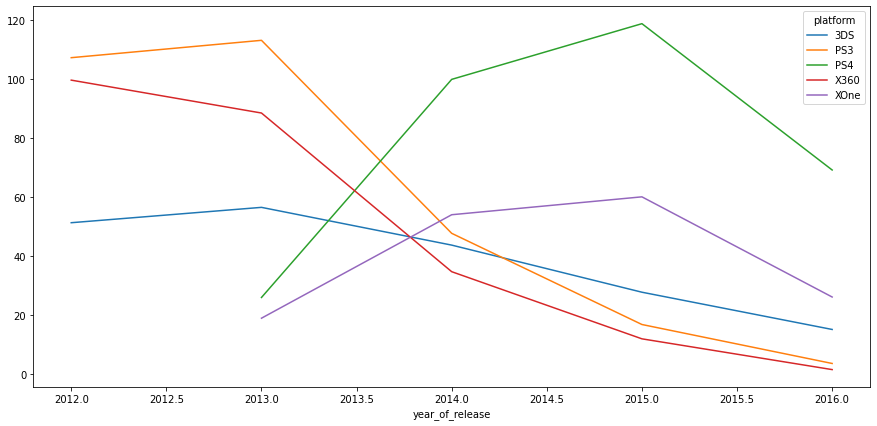

In [27]:
#посмотрим какие платформы из top_5 находятся на стадии раста, а какие на стадии падения
(
    actual_data
    .query('platform in @top_5')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(15, 7))
)

За выбранный актуальный период (2012-2016гг) наибольшее число продаж игр по всему миру зафиксировано для платформы PS4. Доля проданных копий игр на рынке для данной платформы составила 21,7%. Также отмечены высокие продажи игр для платформ PS3 (20%), X360 (16%), 3DS (13%), XOne(11%).  
Несмотря на то, что на графике все платформы показывают падение продаж, что связано с общим трендом рынка игр в 2016 году, потенциально прибыльными платформами можно признать PS4 и XOne. Учитывая, что в среднем платформе необходимо 5 лет для выхода на пик продаж, данные платформы должны еще в течении 2-3 лет  набирать популярность (дата релиза платформ 2013 год). Единственный риск - развитие общего тренда на рынке компьютерных игр - снижение продаж. Но и тут может быть перераспределение долей продаж среди основных участников рынка, которое зависит напрямую от внутренней политики конкретного производителя, и никак не может быть спрогнозировано на основании данных за предыдущие года.  

(0.0, 1.0)

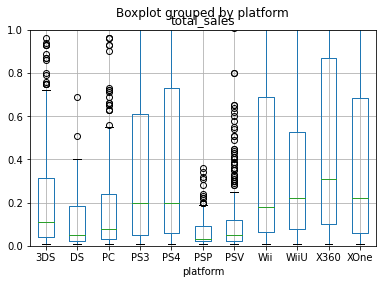

In [28]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
actual_data.boxplot('total_sales', by='platform')
plt.ylim(0, 1)

Данный график позволяет оценить распределение продаж отдельных игр внутри платформ. В целом можно сказать, что для таких платформ как PSP, PSV, DS, PC, 3DS три четверти игр разошлись в пределах до 250 тыс копий. Также для данных платформ характерно то, что распределение значений не имеет большого разброса, то есть примерно все игры пользовались одинаковым спросом. Выбросы говорят о том, что были игры, которые существенно отличались от основной массы игр по количеству распроданных копий. Так, например, для платформы PC отдельные игры были распроданы от 500 тыс копий до 2 млн и выше. 

Для таких платформ как X360, XOne, PS3,PS4, WiiU половина игр была распродана в пределах от 100 тыс до 900 тыс копий. То есть, наблюдается наоборот большой разброс значений. Также стоит отметить, что для данных платформ характерно наличие игр, которые продавались до 3 млн копий. Поскольку они являются единичными, на графике они отмечены как выбросы. 


### Оценка влияния отзывов пользователей и критиков на продажи внутри платформы

In [29]:
#посмотрим, как влияют на продажи внутри самой популярной платформы отзывы пользователей и критиков, подготовим данные
ps4 = (
     actual_data
    .query('platform == "PS4"')
)

ps4_corr = ps4[['critic_score', 'user_score', 'total_sales']]

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


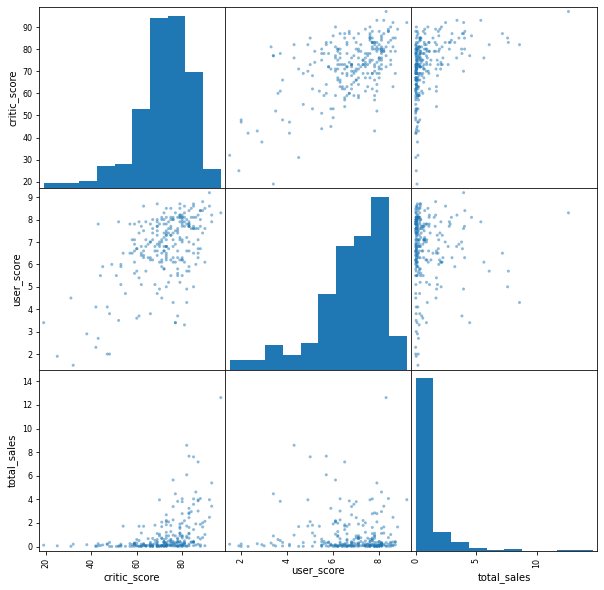

In [30]:
#осмотрим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

pd.plotting.scatter_matrix(ps4_corr, figsize=(10, 10)) 
ps4_corr.corr()

Согласно диаграмме рассеяния зависимости между продажами и оценками критиков и пользователей платформы PS4 не наблюдается, вместе с тем рассчитанный коэфицент корреляции отражет умеренную зависимость между продажами и оценкой критиков. Диаграмма и коэфицент указывают на заметную зависимость оценок критиков и пользователей. Мнение критиков и пользователей об одной и той же игре может совпадать, тогда мы наблюдаем положительную зависимость между оценками. 

,critic_score,user_score,total_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.006164
total_sales,0.360573,0.006164,1.000000


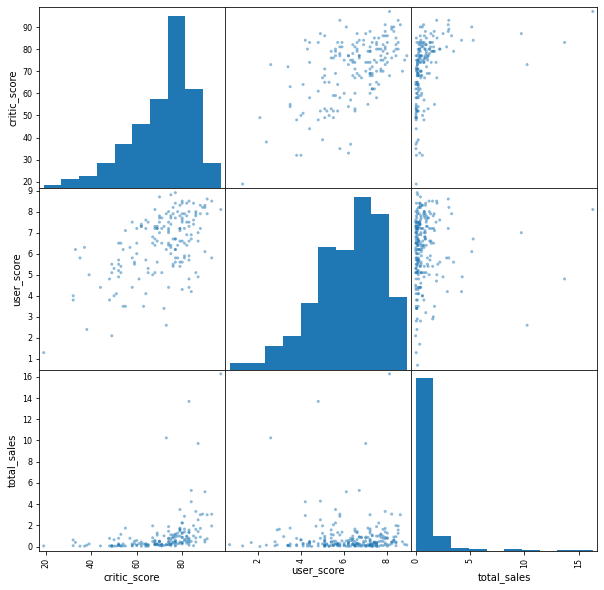

In [31]:
#посмотрим, как влияют на продажи игр отзывы пользователей и критиков внутри платформы x360
x360 = (
     actual_data
    .query('platform == "X360"')
)

x360_corr = x360[['critic_score', 'user_score', 'total_sales']]

pd.plotting.scatter_matrix(x360_corr, figsize=(10, 10)) 
x360_corr.corr()

,critic_score,user_score,total_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
total_sales,0.34838,0.400219,1.000000


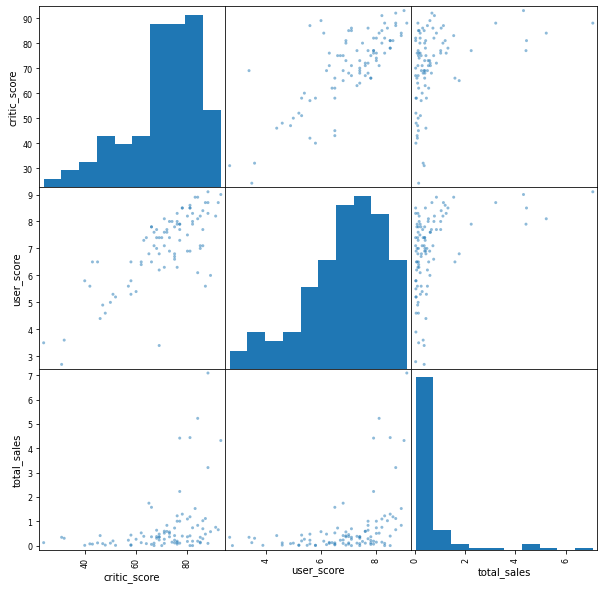

In [32]:
#посмотрим, как влияют на продажи игр отзывы пользователей и критиков внутри платформы wiiu
wiiu = (
     actual_data
    .query('platform == "WiiU"')
)

wiiu_corr = wiiu[['critic_score', 'user_score', 'total_sales']]

pd.plotting.scatter_matrix(wiiu_corr, figsize=(10, 10)) 
wiiu_corr.corr()

В целом зависимость между оценками игр и их продажами на разных платформах примерно одинаковая (умеренная). Оценки пользователей и критиков игр на платформе wiiu имеют высокий коэфицент положительной корреляции. 

### Анализ распределения игр по жанрам

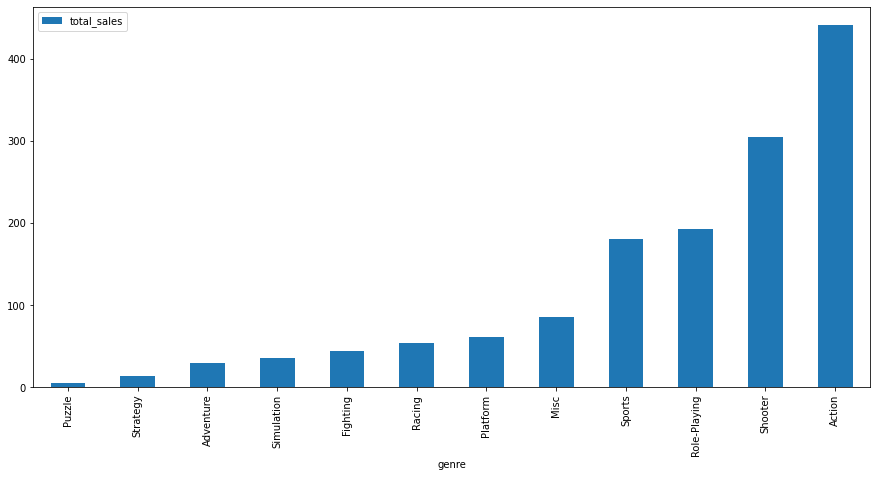

In [74]:
#посмотрим на общее распределение игр по жанрам
(
    actual_data
    .groupby('genre').agg({'total_sales':'sum'})
    .sort_values(by='total_sales')
    .plot.bar(figsize=(15, 7))
)
plt.show()

Согласно столбчатой диаграмме жанрами с высокими продажами являются: экшены, стрелялки, РПГ, спортивные. Низкие продажи у таких жанров, как приключения, стратегии. Самым непопулярным жанром явлется пазл.

(0.0, 5.0)

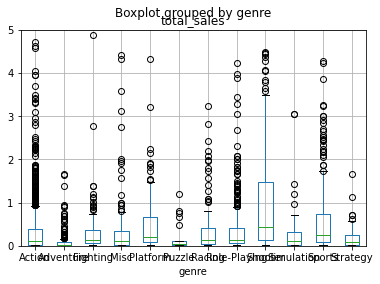

In [34]:
actual_data.boxplot('total_sales', by='genre')
plt.ylim(0, 5)

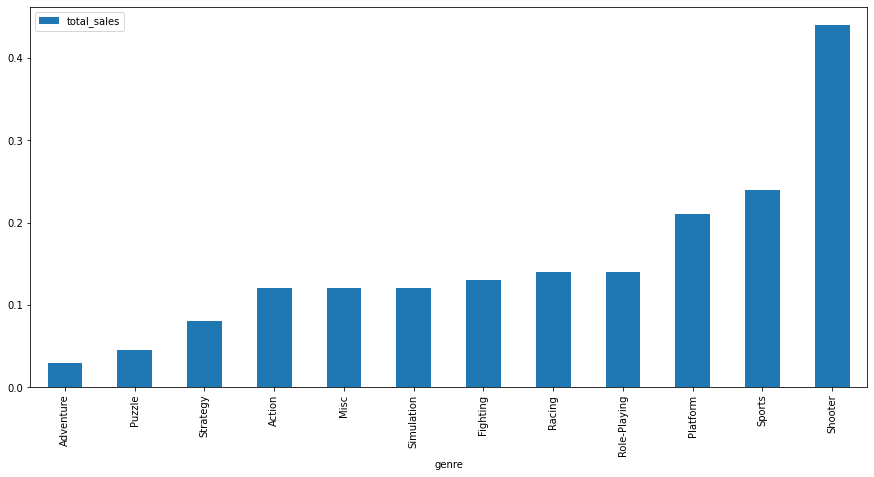

In [73]:
(
    actual_data
    .groupby('genre').agg({'total_sales':'median'})
    .sort_values(by='total_sales')
    .plot.bar(figsize=(15, 7))
)
plt.show()

## Портреты пользователей по регионам


In [36]:
#изучим самые популярные платформы (топ-5) в Северной Америке
(
    actual_data
    .groupby('platform').agg({'na_sales':'sum'})
    .sort_values(by='na_sales',ascending=False)
    .head()
)


,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


<AxesSubplot:ylabel='na_sales'>

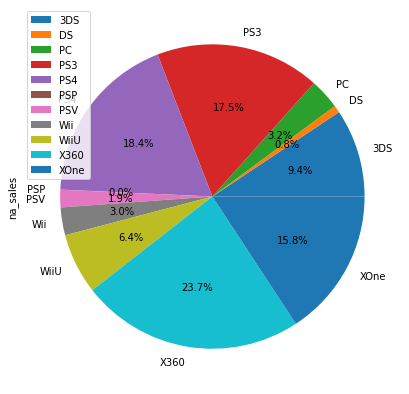

In [37]:
#изучим как распределяются продажи по платформам в Северной Америке
(
    actual_data
    .groupby('platform').agg({'na_sales':'sum'})
    .plot.pie(y='na_sales', autopct='%.1f%%',figsize=(7, 7))
)


In [38]:
#изучим самые популярные платформы (топ-5) в Европе
(
    actual_data
    .groupby('platform').agg({'eu_sales':'sum'})
    .sort_values(by='eu_sales', ascending=False)
    .head()
)


,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


<AxesSubplot:ylabel='eu_sales'>

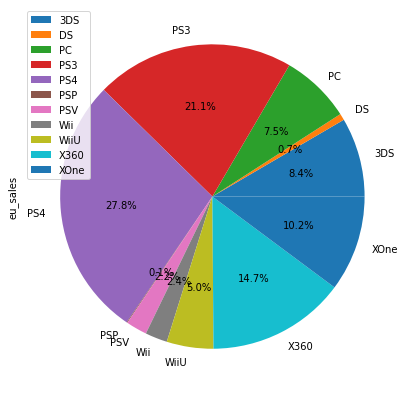

In [39]:
#изучим как распределяются продажи по платформам
(
    actual_data
    .groupby('platform').agg({'eu_sales':'sum'})
    .plot.pie(y='eu_sales', autopct='%.1f%%',figsize=(7, 7))
)


In [40]:
#изучим самые популярные платформы (топ-5) в Японии 
(
    actual_data
    .groupby('platform').agg({'jp_sales':'sum'})
    .sort_values(by='jp_sales', ascending=False)
    .head()
)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


<AxesSubplot:ylabel='jp_sales'>

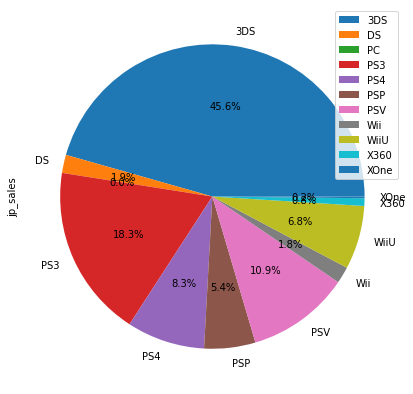

In [41]:
#изучим как распределяются продажи по платформам
(
    actual_data
    .groupby('platform').agg({'jp_sales':'sum'})
    .plot.pie(y='jp_sales', autopct='%.1f%%',figsize=(7, 7))
)


In [42]:
#изучим самые популярные платформы (топ-5) в остальных регионах
(
    actual_data
    .groupby('platform').agg({'other_sales':'sum'})
    .sort_values(by='other_sales', ascending=False)
    .head()
)

,other_sales
platform,
PS4,48.35
PS3,43.26
X360,20.40
XOne,14.27
3DS,8.87


<AxesSubplot:ylabel='other_sales'>

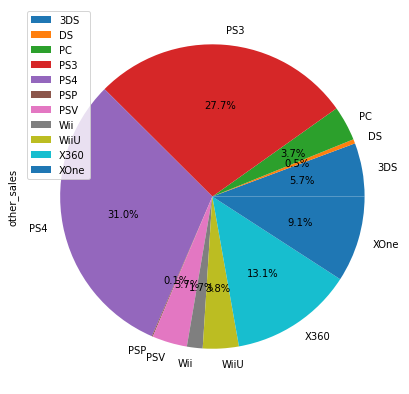

In [43]:
#изучим как распределяются продажи по платформам
(
    actual_data
    .groupby('platform').agg({'other_sales':'sum'})
    .plot.pie(y='other_sales', autopct='%.1f%%',figsize=(7, 7))
)


,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


<AxesSubplot:ylabel='na_sales'>

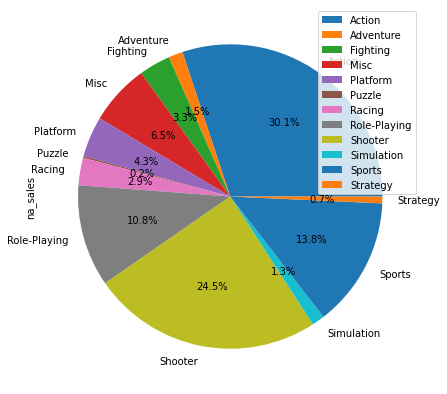

In [44]:
#изучим самые популярные жанры (топ-5) в Северной Америке
display(
    actual_data
    .groupby('genre').agg({'na_sales':'sum'})
    .sort_values(by='na_sales',ascending=False)
    .head()
)
(
    actual_data
    .groupby('genre').agg({'na_sales':'sum'})
    .plot.pie(y='na_sales', autopct='%.1f%%',figsize=(7, 7))
)


,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


<AxesSubplot:ylabel='eu_sales'>

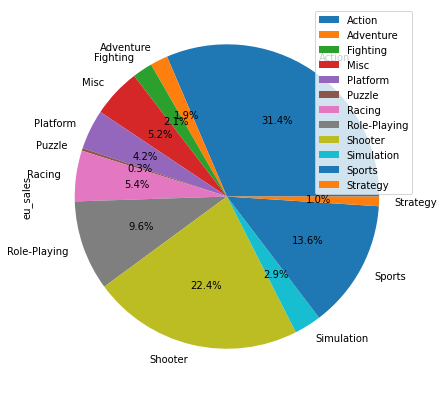

In [45]:
#изучим самые популярные жанры (топ-5) в Европе
display(
    actual_data
    .groupby('genre').agg({'eu_sales':'sum'})
    .sort_values(by='eu_sales',ascending=False)
    .head()
)
(
    actual_data
    .groupby('genre').agg({'eu_sales':'sum'})
    .plot.pie(y='eu_sales', autopct='%.1f%%',figsize=(7, 7))
)


,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


<AxesSubplot:ylabel='jp_sales'>

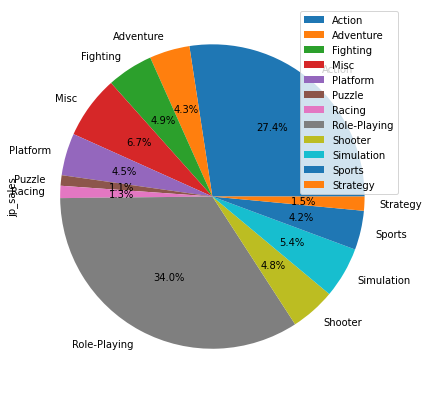

In [46]:
#изучим самые популярные жанры (топ-5) в Японии
display(
    actual_data
    .groupby('genre').agg({'jp_sales':'sum'})
    .sort_values(by='jp_sales',ascending=False)
    .head()
)
(
    actual_data
    .groupby('genre').agg({'jp_sales':'sum'})
    .plot.pie(y='jp_sales', autopct='%.1f%%',figsize=(7, 7))
)


,other_sales
genre,
Action,51.14
Shooter,37.26
Sports,22.44
Role-Playing,14.83
Misc,7.67


<AxesSubplot:ylabel='other_sales'>

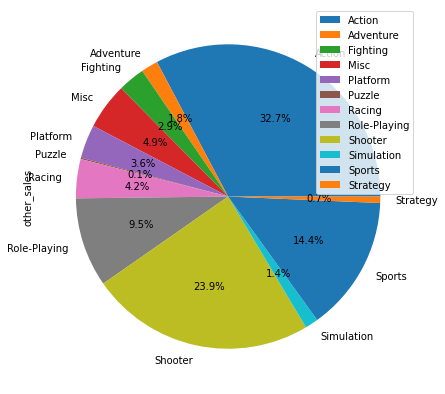

In [47]:
#изучим самые популярные жанры (топ-5) в других регионах
display(
    actual_data
    .groupby('genre').agg({'other_sales':'sum'})
    .sort_values(by='other_sales',ascending=False)
    .head()
)
(
    actual_data
    .groupby('genre').agg({'other_sales':'sum'})
    .plot.pie(y='other_sales', autopct='%.1f%%',figsize=(7, 7))
)


### Вывод
- В Северной Америке  доля продаж игр для платформ компании Microsoft составила 38% (X360 - 23%,  XOne - 15%), для платформ компании PlayStation - 35% (PS4(18%), PS3(17%)), Nintendo 3DS 9%. Наибольшей популярностью среди геймеров пользуются игры жанров: экшен, шутер, спорт, РПГ, аркада.
- В Европе доля продаж игр для платформ компании PlayStation - 48% (PS4(27%), PS3(21%)), для платформ компании Microsoft 24% (X360 - 14%,  XOne - 10%), Nintendo 3DS 8%. Популярны такие жанры как: экшен, шутер, спорт, РПГ, гонки.
- В Японии продажи игр распределись по платформам следующим образом: Nintendo 3DS - 45%, PlayStation 36% (PS3(18%),PSV(10%), PS4(8%)). Популярные жанры игр: РПГ, экшен, аркады, симуляторы, сражения. 
- В остальных регионах продажи игр по платформам: PlayStation - 58% (PS4(31%), PS3(27%)), для платформ компании Microsoft 22% (X360 - 13%,  XOne - 9%), Nintendo 3DS 5%. Популярные жанры: экшен, шутер, спорт, РПГ, аркада.

Таким образом, полученные данные позволяют сделать вывод, что пользователи Европы и других регионов больше отдают предпочтение играм для платформ компании PlayStation (примерно половина всех игр), нежели платформам Microsoft (около четверти игр). Пользователи из Северной Америки примерно одинаково играют в игры на платформах  PlayStation и Microsoft. Пользователи Европы, Северной Америки и других регионов схожи в том, что выбирают игровые консоли, доля игр для портативных устройств незначительная от 5% до 9%, в отличии от пользователей Японии, где доля игр для портативных игровых устройств превышает 50%. Лидирующую по продажам в остальном мире платформу PS4 в Японии опережает PSV. Также интерсно, что большим спросом в Японии пользуются РПГ. 

<AxesSubplot:xlabel='rating'>

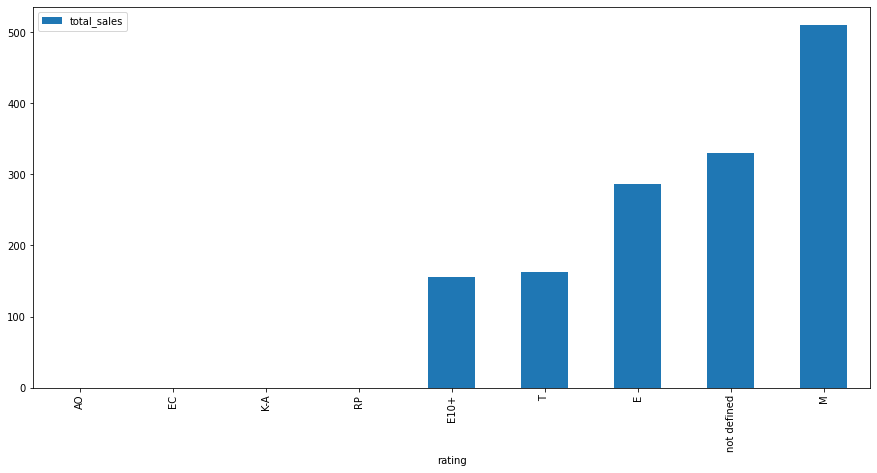

In [48]:
#узнаем как количество проданных копий игр распеределяется по рейтингам ESRB во всем мире
(
    actual_data
    .groupby('rating').agg({'total_sales':'sum'})
    .sort_values(by='total_sales')
    .plot.bar(figsize=(15, 7))
)

<AxesSubplot:xlabel='rating'>

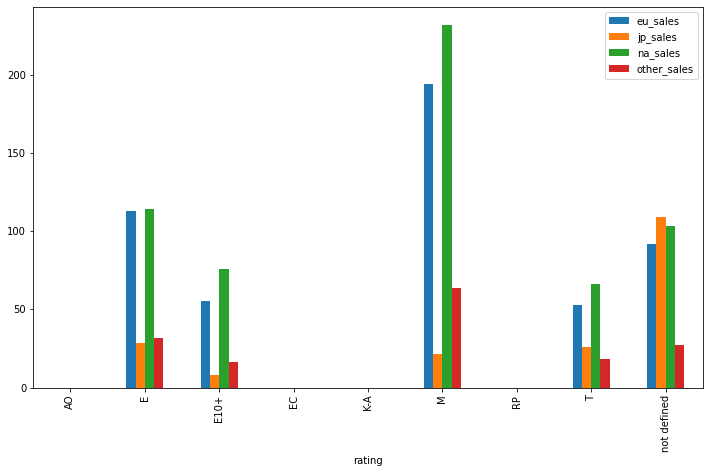

In [49]:
#проанализируем влияет ли рейтинг ESRB на продажи в отдельном регионе
(
    actual_data
    .pivot_table(index='rating', values=['na_sales', 'eu_sales','jp_sales', 'other_sales'], aggfunc='sum')
    .plot.bar(figsize=(12, 7))
)

<AxesSubplot:ylabel='na_sales'>

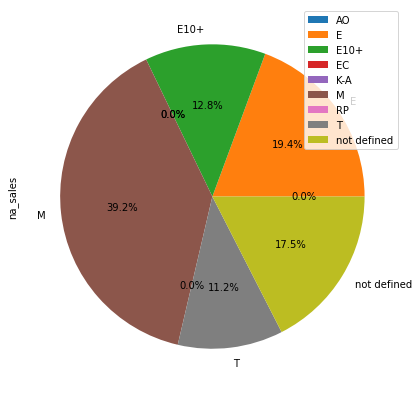

In [50]:
#рейтинг ESRB и продажи в Северной Америке
(
    actual_data
    .groupby('rating').agg({'na_sales':'sum'})
    .plot.pie(y='na_sales', autopct='%.1f%%',figsize=(7, 7))
)



<AxesSubplot:ylabel='eu_sales'>

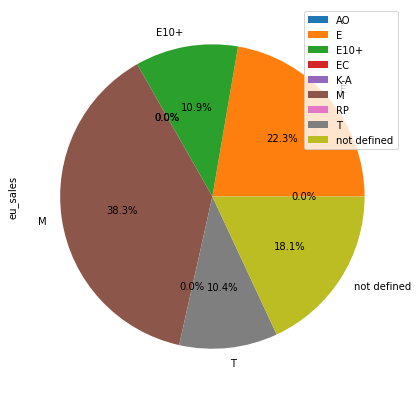

In [51]:
#рейтинг ESRB и продажи в Европе
(
    actual_data
    .groupby('rating').agg({'eu_sales':'sum'})
    .plot.pie(y='eu_sales', autopct='%.1f%%',figsize=(7, 7))
)


<AxesSubplot:ylabel='jp_sales'>

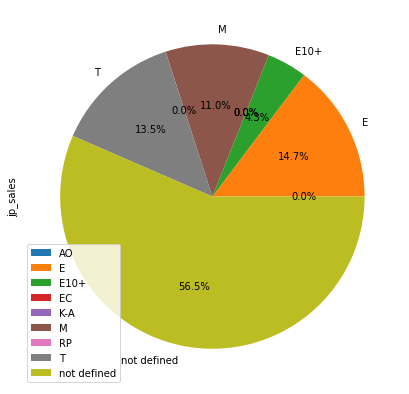

In [52]:
#рейтинг ESRB и продажи в Японии
(
    actual_data
    .groupby('rating').agg({'jp_sales':'sum'})
    .plot.pie(y='jp_sales', autopct='%.1f%%',figsize=(7, 7))
)


<AxesSubplot:ylabel='other_sales'>

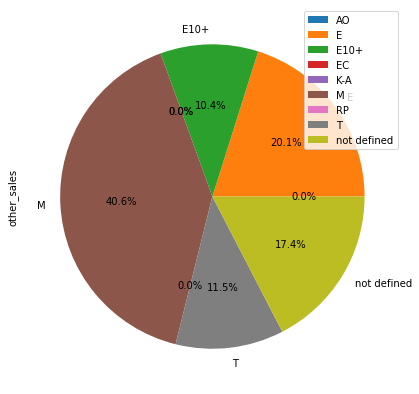

In [53]:
#рейтинг ESRB и продажи в других регионах
(
    actual_data
    .groupby('rating').agg({'other_sales':'sum'})
    .plot.pie(y='other_sales', autopct='%.1f%%',figsize=(7, 7))
)

### Вывод
В Северной Америке, Европе и других регионах (кроме Японии) около 40% проданных игр приходится на игры с рейтингом для взрослых, около 20% игр с рейтингом для всех, еще около 18% не имеет рейтинга. Примерно по 10% приходится на игры для детей старше 10 лет и игр для подростков. В Японии же 56% проданных игр не имеет рейтинга, по 14 % приходится на игры для всех и подростков, всего лишь 11% игр имеет рейтинг для взрослых, и незначительная доля в 5% приходится на игры для детей старше 10 лет.

Сложно определить влияет ли рейтинг ESRB на продажи в отдельном регионе. Данные позволяют сделать вывод, что доля проданных игр с одним рейтингом одинакова во всем мире, кроме Японии.  


## Проверка статистических гипотез



### Сравнение средних пользовательских рейтингов платформ Xbox One и PC 

Cформулирeм нулевую и альтернативную гипотезы:

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны;

H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.


In [54]:
#подготовм данные для статистического анализа
xbox1_user_score = actual_data.loc[actual_data['platform']=='XOne', 'user_score']
print('Пропусков до:', xbox1_user_score.isna().sum())
xbox1_user_score = xbox1_user_score.dropna()
print('Пропусков после:', xbox1_user_score.isna().sum())

Пропусков до: 65
Пропусков после: 0


In [55]:
#подготовм данные для статистического анализа
pc_user_score = actual_data.loc[actual_data['platform']=='PC', 'user_score']
print('Пропусков до:', pc_user_score.isna().sum())
pc_user_score = pc_user_score.dropna()
print('Пропусков после:', pc_user_score.isna().sum())

Пропусков до: 44
Пропусков после: 0


In [56]:
#узнаем размер выборок
print('Выборка Xbox:', len(xbox1_user_score))
print('Выборка PC:', len(pc_user_score))

Выборка Xbox: 182
Выборка PC: 206


<AxesSubplot:ylabel='Density'>

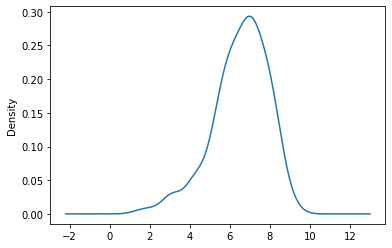

In [57]:
#построим графики распределений значений в выборках
xbox1_user_score.plot.kde()

<AxesSubplot:ylabel='Density'>

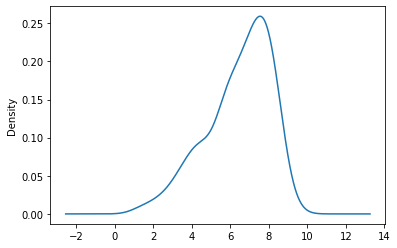

In [58]:
pc_user_score.plot.kde()

Выборки  достаточно большие и равные по размеру. Значения имеют нормальное распределение с незначительным смещением влево. Таким образом, для проверки гипотез будем использовать t-тест. Критический уровень статистической значимости установим в 5 %, если p-value окажется меньше него - отвегнем нулевую гипотезу.

In [59]:
#сделаем проверку гипотез

alpha = .05 
results = st.ttest_ind(
    xbox1_user_score, 
    pc_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Полученное p-значение не позволяет сделать вывод о значимом различии между средними рейтингами платформ Хbox и PC.

### Средние пользовательские рейтинги жанров Action и Sports

Cформулирeм нулевую и альтернативную гипотезы:

H0: Средние пользовательские рейтинги жанров Action и Sports равны;

H1: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [60]:
#подготовм данные для статистического анализа
action_user_score = actual_data.loc[actual_data['genre']=='Action', 'user_score']
print('Пропусков до:', action_user_score.isna().sum())
action_user_score = action_user_score.dropna()
print('Пропусков после:', action_user_score.isna().sum())

Пропусков до: 508
Пропусков после: 0


In [61]:
sports_user_score = actual_data.loc[actual_data['genre']=='Sports', 'user_score']
print('Пропусков до:', sports_user_score.isna().sum())
sports_user_score = sports_user_score.dropna()
print('Пропусков после:', sports_user_score.isna().sum())

Пропусков до: 73
Пропусков после: 0


In [62]:
#узнаем размер выборок
print('Выборка Action:', len(action_user_score))
print('Выборка Sports:', len(sports_user_score))

Выборка Action: 523
Выборка Sports: 195


<AxesSubplot:ylabel='Density'>

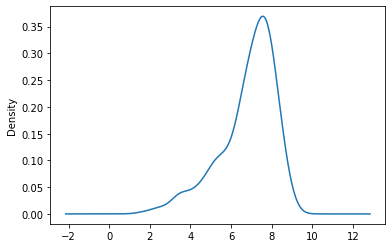

In [63]:
#построим графики распределений значений в выборках
action_user_score.plot.kde()

<AxesSubplot:ylabel='Density'>

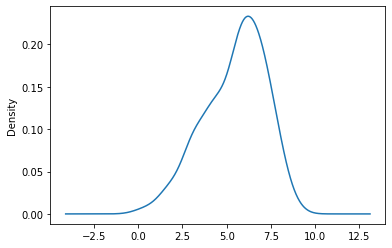

In [64]:
sports_user_score.plot.kde()

Выборки  достаточно большие, но не равны по размеру. Значения имеют нормальное распределение с незначительным смещением влево. Для проверки гипотез будем использовать t-тест. Дополнительно при тестировании укажем, что дисперсии не равны. Критический уровень статистической значимости установим в 5 %, если p-value окажется меньше него - отвегнем нулевую гипотезу.

In [65]:
#сделаем проверку гипотез

alpha = .05 
results = st.ttest_ind(
    action_user_score, 
    sports_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Полученное p-value говорит о том, что вероятность получить такое различие между  cредними пользовательскими рейтингами жанров Action и Sports случайно ниже заданного критерия значимости, поэтому следует, что разница между рейтингами значительная, чтобы принять нулевую гипотезу.

## Общий вывод

В результате проведенного исследовния были решены следующие задачи.

На этапе предобработки данных были приведены к нижнему регистру названия стобцов, дано объяснение аббревиатуре 'tbd' в столбце с оценкой пользователей и произведена замена на NaN, для удобства обработки значений было произведено изменение типа данных в столбцах user_score и rating, обработаны пропуски. Также был осуществлен подсчет продаж игр по всем регионам.

Исследовательский анализ данных позволил определить на основании жизненного цикла платформ актуальный период для анализа, который позволил оценить с точки зрения прибыльности платформы. Так потенциально прибыльными платформами были признаны PS4 и XOne, поскольку именно данные платформы  будут еще в течении 2-3 лет набирать популярность. Также было установлено, что между оценками игр и их продажами наблюдается умеренная положительная корреляция. Более явную зависимость имеют оценки критиков и пользователей (положительная корреляция).

В ходе исследовательского анализа были выявлены общие и отличительные черты пользователей разных регионов. Так, например, пользователи из Европы и других регионов (кроме Сев.Америки и Японии) больше отдают предпочтение играм для платформ компании PlayStation (примерно половина всех игр), нежели платформам Microsoft (около четверти игр). Пользователи из Северной Америки примерно одинаково играют в игры на платформах PlayStation и Microsoft. Пользователи Европы, Северной Америки и других регионов схожи в том, что выбирают игровые консоли, доля игр для портативных устройств незначительная от 5% до 9%, в отличии от пользователей Японии, где доля игр для портативных игровых устройств превышает 50%. Лидирующую по продажам в остальном мире платформу PS4 в Японии опережает PSV. Также интересно, что большим спросом в Японии пользуются игры в жанре РПГ.

Разбивка проданных игр по рейтингам ESRB показала, что во всем мире (кроме Японии) доля продаж тех или иных игр с определенным рейтингом одинаковая. Около 40% проданных игр приходится на игры с рейтингом для взрослых, около 20% игр с рейтингом для всех, еще около 18% не имеет рейтинга. Примерно по 10% приходится на игры для детей старше 10 лет и игр для подростков. В Японии же 56% проданных игр не имеет рейтинга, по 14 % приходится на игры для всех и подростков, всего лишь 11% игр имеет рейтинг для взрослых, и незначительная доля в 5% приходится на игры для детей старше 10 лет.

На этапе статистического анализа данных были проверены гипотезы о равенстве средних значений пользовательских оценок платформ XOne и PC, а также жанров "экшен" и "спортивные состязания". На основании t-критерия была подтверждена гипотеза о равенстве пользовательских оценок платформ XOne и PC. Средние пользовательские оценки жанров экшен и спортивных состязаний оказались настолько различными, что пришлось отвергнуть гипотезу о их равенстве и принять альтернативную гипотезу.

Таким образом, проведенный анализ данных позволяет выделить причины, которые могут оказывать влияние на успешность игры среди пользователей:
1. платформа, для которой выпущена игра. При выборе игр для рекламных кампаний, предпочтение стоит отдавать тем играм, которые разработаны для платформ, находящихся в стадии роста;
2. жанр игры. Наиболее популярными во всем мире являются жанры шутеры, спортивные состязания и платформеры.

Вместе с тем исследоватльский анализ данных показал, что региональная специфика также играет большую роль и при планировании рекламных кампаний стоит ее учитывать. 